In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
from currency_converter import RateNotFoundError

from currency_converter import CurrencyConverter

In [41]:
import datetime

In [ ]:
def change_currency(date):
    try:
        change = c.convert(1, 'MXN', 'USD', date)
        return change
    except RateNotFoundError:
        pass
    month = date.month
    for i, new_month in enumerate(range(month + 1, month + 12)):
        if new_month != 12:
            new_month = new_month % 12
        new_date = datetime.date(date.year, new_month, 1)
        try:
            change = c.convert(1, 'MXN', 'USD', new_date)
            return change
        except RateNotFoundError:
            pass
    return 1 / 15  # 15 pesos to USD
        

In [191]:
def trim_mx(name):
    if name is pd.NA:
        return name
    if name.startswith("MX-"):
        return name[3:]
    else:
        return name

## Pre-processing

In [42]:
cnts = pd.read_csv('/home/rdora/declaranet/data/pre-process/contratos_4.csv')

In [3]:
contratos = pd.read_csv('/home/rdora/declaranet/data/tables/contratos.csv')

/home/rdora/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
contratos_2 = contratos[['fecha_inicio', 'codigo_contrato', 'importe_contrato', 'moneda', 'proveedor_contratista', 'codigo_expediente']]

In [19]:
contratos_2 = contratos_2[contratos_2.proveedor_contratista.notna()]

In [43]:
cnts = pd.merge(
    cnts,
    coex,
    how='left',
    on='codigo_contrato')

In [30]:
coex = contratos[['codigo_contrato', 'codigo_expediente']]

In [32]:
coex = coex.drop_duplicates()

In [37]:
coex = coex.dropna()

In [39]:
coex = coex.drop_duplicates(subset='codigo_contrato')

In [40]:
coex.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1798599 entries, 0 to 1801207
Data columns (total 2 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   codigo_contrato    1798599 non-null  object
 1   codigo_expediente  1798599 non-null  object
dtypes: object(2)
memory usage: 41.2+ MB


In [27]:
contratos[contratos.codigo_expediente==1299013].iloc[0]

gobierno                                                                      APF
siglas                                                                   INDAABIN
dependencia                     Instituto de Administración y Avalúos de Biene...
claveuc                                                                 006A00997
nombre_de_la_uc                 INDAABIN-Dirección General de Avalúos y Obras ...
responsable                                   Gerardo Alfonso Gutiérrez Hernández
codigo_expediente                                                         1299013
fecha_apertura_proposiciones                                                  NaN
caracter                                                                 Nacional
tipo_contratacion                                                       Servicios
tipo_procedimiento                                   Adjudicación Directa Federal
forma_procedimiento                                                    Presencial
codigo_contrato 

In [59]:
contratos[contratos.proveedor_contratista=='CELESTE VALUACIONES SA DE CV'].tail()

,gobierno,siglas,dependencia,claveuc,nombre_de_la_uc,responsable,codigo_expediente,fecha_apertura_proposiciones,caracter,tipo_contratacion,...,fecha_inicio,fecha_fin,importe_contrato,moneda,estatus_contrato,folio_rupc,proveedor_contratista,estratificacion_mpc,siglas_pais,anuncio
1336841,APF,INDAABIN,Instituto de Administración y Avalúos de Biene...,006A00997,INDAABIN-Dirección General de Avalúos y Obras ...,Gerardo Alfonso Gutiérrez Hernández,1296524,NaN,Nacional,Servicios,...,2017-02-15,2017-05-03,3500.0,MXN,Expirado,NaN,CELESTE VALUACIONES SA DE CV,Micro,MX,https://compranet.funcionpublica.gob.mx/esop/g...
1338276,APF,INDAABIN,Instituto de Administración y Avalúos de Biene...,006A00997,INDAABIN-Dirección General de Avalúos y Obras ...,Gerardo Alfonso Gutiérrez Hernández,1301214,NaN,Nacional,Servicios,...,2017-02-15,2017-05-02,3500.0,MXN,Expirado,NaN,CELESTE VALUACIONES SA DE CV,Micro,MX,https://compranet.funcionpublica.gob.mx/esop/g...
1340025,APF,INDAABIN,Instituto de Administración y Avalúos de Biene...,006A00997,INDAABIN-Dirección General de Avalúos y Obras ...,Gerardo Alfonso Gutiérrez Hernández,1303598,NaN,Nacional,Servicios,...,2017-02-15 00:00:00,2017-04-24 00:00:00,3500.0,MXN,Expirado,NaN,CELESTE VALUACIONES SA DE CV,Micro,MX,https://compranet.funcionpublica.gob.mx/esop/g...
1340847,APF,INDAABIN,Instituto de Administración y Avalúos de Biene...,006A00997,INDAABIN-Dirección General de Avalúos y Obras ...,Gerardo Alfonso Gutiérrez Hernández,1301208,NaN,Nacional,Servicios,...,2017-02-15 00:00:00,2017-04-26 00:00:00,3500.0,MXN,Expirado,NaN,CELESTE VALUACIONES SA DE CV,Micro,MX,https://compranet.funcionpublica.gob.mx/esop/g...
1768650,APF,INDAABIN,Instituto de Administración y Avalúos de Biene...,006A00997,INDAABIN-Dirección General de Avalúos y Obras ...,Gerardo Alfonso Gutiérrez Hernández,1098891,NaN,Nacional,Servicios,...,2015-11-13 00:00:00,2015-12-16 00:00:00,10147.0,MXN,Expirado,NaN,CELESTE VALUACIONES SA DE CV,Micro,MX,https://compranet.funcionpublica.gob.mx/esop/g...


In [56]:
cnts[cnts.codigo_contrato==1638688]

,gobierno,siglas,tipo_procedimiento,fecha_inicio,fecha_fin,importe_contrato,moneda,proveedor_contratista,siglas_pais,s_entidad_federativa,person,ramo,b_entidad_federativa,codigo_contrato,codigo_expediente
980809,APF,INDAABIN,Adjudicación Directa Federal,2017-02-15 00:00:00,2017-04-28 00:00:00,3500.0,MXN,CELESTE VALUACIONES SA DE CV,MX,MX-JAL,0.0,6,MX-CMX,1638688,1302630
982166,APF,INDAABIN,Adjudicación Directa Federal,2017-02-15 00:00:00,2017-05-03 00:00:00,3500.0,MXN,CELESTE VALUACIONES SA DE CV,MX,MX-JAL,0.0,6,MX-CMX,1638688,1302630
982346,APF,INDAABIN,Adjudicación Directa Federal,2017-02-15 00:00:00,2017-05-02 00:00:00,3500.0,MXN,CELESTE VALUACIONES SA DE CV,MX,MX-JAL,0.0,6,MX-CMX,1638688,1302630
983466,APF,INDAABIN,Adjudicación Directa Federal,2017-02-15 00:00:00,2017-04-26 00:00:00,3500.0,MXN,CELESTE VALUACIONES SA DE CV,MX,MX-JAL,0.0,6,MX-CMX,1638688,1302630
983748,APF,INDAABIN,Adjudicación Directa Federal,2017-02-15 00:00:00,2017-04-25 00:00:00,3500.0,MXN,CELESTE VALUACIONES SA DE CV,MX,MX-JAL,0.0,6,MX-CMX,1638688,1302630
983828,APF,INDAABIN,Adjudicación Directa Federal,2017-02-15 00:00:00,2017-05-04 00:00:00,3500.0,MXN,CELESTE VALUACIONES SA DE CV,MX,MX-JAL,0.0,6,MX-CMX,1638688,1302630
983953,APF,INDAABIN,Adjudicación Directa Federal,2017-02-15 00:00:00,2017-04-21 00:00:00,3500.0,MXN,CELESTE VALUACIONES SA DE CV,MX,MX-JAL,0.0,6,MX-CMX,1638688,1302630
985898,APF,INDAABIN,Adjudicación Directa Federal,2017-02-15 00:00:00,2017-04-10 00:00:00,3500.0,MXN,CELESTE VALUACIONES SA DE CV,MX,MX-JAL,0.0,6,MX-CMX,1638688,1302630
986792,APF,INDAABIN,Adjudicación Directa Federal,2017-02-15 00:00:00,2017-04-24 00:00:00,3500.0,MXN,CELESTE VALUACIONES SA DE CV,MX,MX-JAL,0.0,6,MX-CMX,1638688,1302630
987227,APF,INDAABIN,Adjudicación Directa Federal,2017-02-15 00:00:00,2017-04-19 00:00:00,3500.0,MXN,CELESTE VALUACIONES SA DE CV,MX,MX-JAL,0.0,6,MX-CMX,1638688,1302630


In [45]:
cnts.codigo_expediente.value_counts()

553734     1577
12667       378
989931      279
984617      269
1270075     248
           ... 
1248491       1
1248486       1
1248483       1
1248478       1
2097157       1
Name: codigo_expediente, Length: 883804, dtype: int64

In [44]:
cnts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227550 entries, 0 to 1227549
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   gobierno               1227550 non-null  object 
 1   siglas                 1227550 non-null  object 
 2   tipo_procedimiento     1227144 non-null  object 
 3   fecha_inicio           1227550 non-null  object 
 4   fecha_fin              1227479 non-null  object 
 5   importe_contrato       1227550 non-null  float64
 6   moneda                 1227550 non-null  object 
 7   proveedor_contratista  1227550 non-null  object 
 8   siglas_pais            1227550 non-null  object 
 9   s_entidad_federativa   1227550 non-null  object 
 10  person                 1227550 non-null  float64
 11  ramo                   1227550 non-null  int64  
 12  b_entidad_federativa   1227125 non-null  object 
 13  codigo_contrato        1227550 non-null  object 
 14  codigo_expediente 

In [54]:
cnts.codigo_contrato.value_counts()

1644316    22
1684782    22
1638688    20
1535425    20
1529877    20
           ..
1312296     1
1312298     1
1312304     1
1312305     1
2097152     1
Name: codigo_contrato, Length: 1222455, dtype: int64

In [23]:
cnts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227550 entries, 0 to 1227549
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   gobierno               1227550 non-null  object 
 1   siglas                 1227550 non-null  object 
 2   tipo_procedimiento     1227144 non-null  object 
 3   fecha_inicio           1227550 non-null  object 
 4   fecha_fin              1227479 non-null  object 
 5   importe_contrato       1227550 non-null  float64
 6   moneda                 1227550 non-null  object 
 7   proveedor_contratista  1227550 non-null  object 
 8   siglas_pais            1227550 non-null  object 
 9   s_entidad_federativa   1227550 non-null  object 
 10  person                 1227550 non-null  float64
 11  ramo                   1227550 non-null  int64  
 12  b_entidad_federativa   1227125 non-null  object 
 13  codigo_contrato        1227550 non-null  object 
 14  codigo_expediente 

In [5]:
cnts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227550 entries, 0 to 1227549
Data columns (total 14 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   gobierno               1227550 non-null  object 
 1   siglas                 1227550 non-null  object 
 2   tipo_procedimiento     1227144 non-null  object 
 3   fecha_inicio           1227550 non-null  object 
 4   fecha_fin              1227479 non-null  object 
 5   importe_contrato       1227550 non-null  float64
 6   moneda                 1227550 non-null  object 
 7   proveedor_contratista  1227550 non-null  object 
 8   siglas_pais            1227550 non-null  object 
 9   s_entidad_federativa   1227550 non-null  object 
 10  person                 1227550 non-null  float64
 11  ramo                   1227550 non-null  int64  
 12  b_entidad_federativa   1227125 non-null  object 
 13  codigo_contrato        1227550 non-null  int64  
dtypes: float64(2), int

### Names

In [192]:
cnts['b_entidad_federativa'] = cnts.b_entidad_federativa.apply(trim_mx)

In [193]:
cnts['s_entidad_federativa'] = cnts.s_entidad_federativa.apply(trim_mx)

### Money

In [37]:
c = CurrencyConverter()

In [7]:
path = "/home/rdora/declaranet/data/pre-process/contratos_4.csv"
dtypes = {'importe_contrato': 'int', 'codigo_contrato': 'int',
          'ramo': 'int'}
date_cols = ['fecha_inicio', 'fecha_fin']

In [109]:
cnts = pd.read_csv(path, dtype=dtypes, parse_dates=date_cols)

In [110]:
cnts[cnts.select_dtypes('object').columns] = cnts.select_dtypes('object').astype('string')

Change everything to dollars

In [117]:
cnts.loc[cnts.moneda=='MXN', 'importe_contrato'] = (
                  cnts.loc[cnts.moneda=='MXN', 'fecha_inicio'].dt.date.apply(change_currency) *
                  cnts.loc[cnts.moneda=='MXN', 'importe_contrato']).apply(np.floor).astype('int')

In [119]:
cnts = cnts.drop('moneda', axis=1)

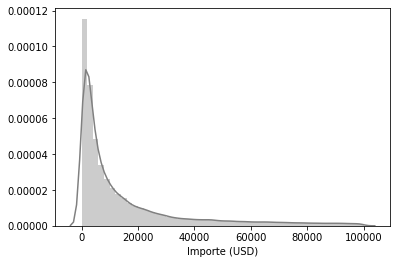

In [136]:
sns.distplot(cnts.loc[cnts.importe_contrato < 1e5, 'importe_contrato'], color='gray').set(xlabel="Importe (USD)");

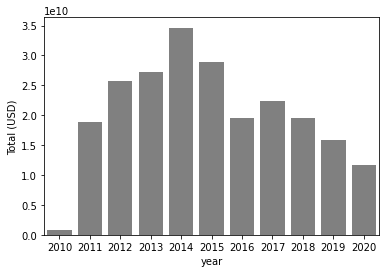

In [175]:
cnts['year'] = cnts.fecha_inicio.dt.year
gbyear = cnts.groupby('year')['importe_contrato'].sum().reset_index().sort_values(by='year')
sns.barplot(x='year', y='importe_contrato', data=gbyear, color='gray').set(ylabel="Total (USD)");

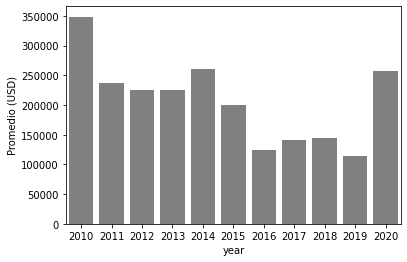

In [178]:
cnts['year'] = cnts.fecha_inicio.dt.year
gbyear = cnts.groupby('year')['importe_contrato'].mean().reset_index().sort_values(by='year')
sns.barplot(x='year', y='importe_contrato', data=gbyear, color='gray').set(ylabel="Promedio (USD)");

In [171]:
print(f"{(cnts.importe_contrato.sum() / 1.2e12):-30,.2%} OF year 2019 GDP")

                        18.75% OF year 2019 GDP


In [164]:
print(f"{cnts.importe_contrato.sum():-30,d} USD TOTAL")

               225,004,651,411 USD TOTAL


## Gobierno

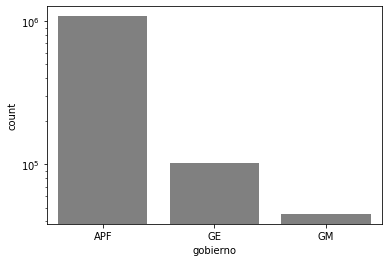

In [21]:
sns.countplot(x="gobierno", data=cnts, color='gray').set(yscale='log');

## Entidad Federativa compradora

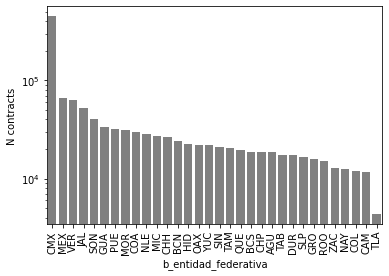

In [195]:
sns.countplot(x="b_entidad_federativa",
              data=cnts,
              order=cnts['b_entidad_federativa'].value_counts().index,
              color="gray").set(ylabel="N contracts", yscale="log")
plt.xticks(rotation=90);

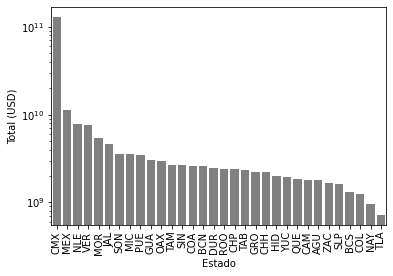

In [201]:
gbef = cnts.groupby('b_entidad_federativa')\
       .importe_contrato.sum()\
       .reset_index()\
       .sort_values(by="importe_contrato", ascending=False)
sns.barplot(x="b_entidad_federativa", y="importe_contrato", data=gbef, color='gray')\
    .set(ylabel="Total (USD)", xlabel="Estado", yscale="log")
plt.xticks(rotation=90);

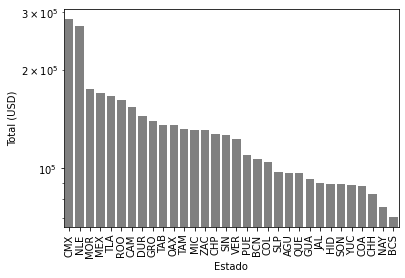

In [202]:
gbef = cnts.groupby('b_entidad_federativa')\
       .importe_contrato.mean()\
       .reset_index()\
       .sort_values(by="importe_contrato", ascending=False)
sns.barplot(x="b_entidad_federativa", y="importe_contrato", data=gbef, color='gray')\
    .set(ylabel="Total (USD)", xlabel="Estado", yscale="log")
plt.xticks(rotation=90);